In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
ap_df = (
    pd.read_parquet("output/find-consensus-profiles-ap.parquet")
    .query("scenario=='s3'")
    .reset_index(drop=True)
)

corum_s3_ap_df = ap_df.query("annotation=='corum'").copy()
gene_group_s3_ap_df = ap_df.query("annotation=='gene-group'").copy()

In [3]:
map_df = (
    pd.read_parquet("output/find-consensus-profiles-map.parquet")
    .query("scenario=='s3'")
    .reset_index(drop=True)
)
corum_s3_map_df = map_df.query("annotation=='corum'")
gene_group_s3_map_df = map_df.query("annotation=='gene-group'")

In [4]:
corum_s3_ap_count_df = (
    corum_s3_ap_df.groupby(["Metadata_corum_complex_list"])
    .n_pos_pairs.mean()
    .reset_index()
)

gene_group_s3_ap_count_df = (
    gene_group_s3_ap_df.groupby(["Metadata_gene_group_list"])
    .n_pos_pairs.mean()
    .reset_index()
)

In [5]:
corum_s3_map_df = (
    corum_s3_map_df.merge(corum_s3_ap_count_df, on="Metadata_corum_complex_list", how="left")
)

gene_group_s3_map_df = (
    gene_group_s3_map_df.merge(gene_group_s3_ap_count_df, on="Metadata_gene_group_list", how="left")
)

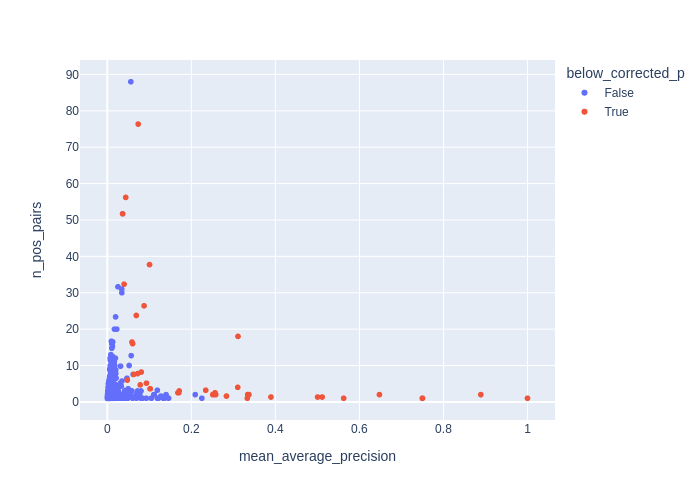

In [6]:
fig = px.scatter(
    corum_s3_map_df,
    x="mean_average_precision",
    y="n_pos_pairs",
    color="below_corrected_p",
)

fig.show("png")

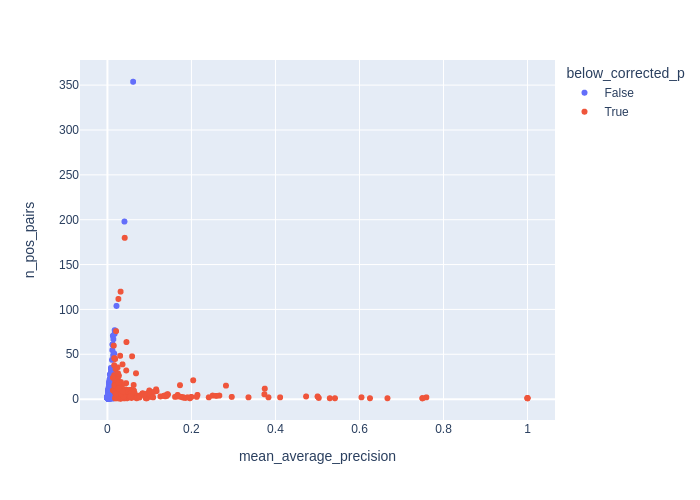

In [7]:
fig = px.scatter(
    gene_group_s3_map_df,
    x="mean_average_precision",
    y="n_pos_pairs",
    color="below_corrected_p",
)

fig.show("png")

In [8]:
ap_df = (
    pd.read_parquet("output/find-consensus-profiles-ap.parquet")
    .query("scenario=='s2'")
    .reset_index(drop=True)
)

corum_s2_ap_df = ap_df.query("annotation=='corum'").copy()
gene_group_s2_ap_df = ap_df.query("annotation=='gene-group'").copy()

In [9]:
map_df = (
    pd.read_parquet("output/find-consensus-profiles-map.parquet")
    .query("scenario=='s2'")
    .reset_index(drop=True)
)
corum_s2_map_df = map_df.query("annotation=='corum'")
gene_group_s2_map_df = map_df.query("annotation=='gene-group'")

In [10]:
corum_s2_ap_count_df = (
    corum_s2_ap_df.groupby(["Metadata_corum_complex_list"])
    .n_pos_pairs.mean()
    .reset_index()
)

gene_group_s2_ap_count_df = (
    gene_group_s2_ap_df.groupby(["Metadata_gene_group_list"])
    .n_pos_pairs.mean()
    .reset_index()
)

In [11]:
corum_s2_map_df = (
    corum_s2_map_df.merge(corum_s2_ap_count_df, on="Metadata_corum_complex_list", how="left")
)

gene_group_s2_map_df = (
    gene_group_s2_map_df.merge(gene_group_s2_ap_count_df, on="Metadata_gene_group_list", how="left")
)

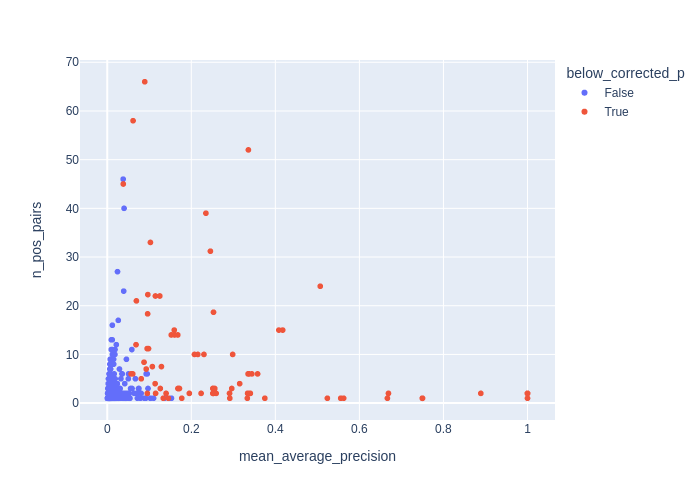

In [12]:
fig = px.scatter(
    corum_s2_map_df,
    x="mean_average_precision",
    y="n_pos_pairs",
    color="below_corrected_p",
)

fig.show("png")

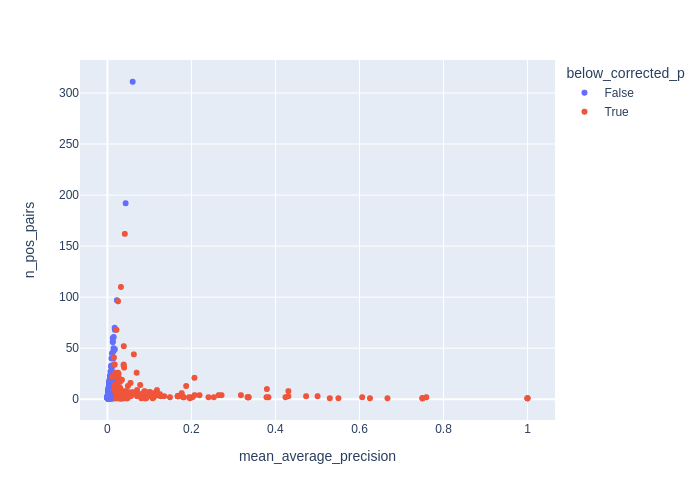

In [13]:
fig = px.scatter(
    gene_group_s2_map_df,
    x="mean_average_precision",
    y="n_pos_pairs",
    color="below_corrected_p",
)

fig.show("png")

In [14]:
cols = [
    "Metadata_corum_complex_list",
    "mean_average_precision",
    "corrected_p_value",
    "below_corrected_p",
    "n_pos_pairs",
]

df = corum_s2_map_df[cols].merge(
    corum_s3_map_df[cols],
    on="Metadata_corum_complex_list",
    how="inner",
    suffixes=("_s2", "_s3"),
)

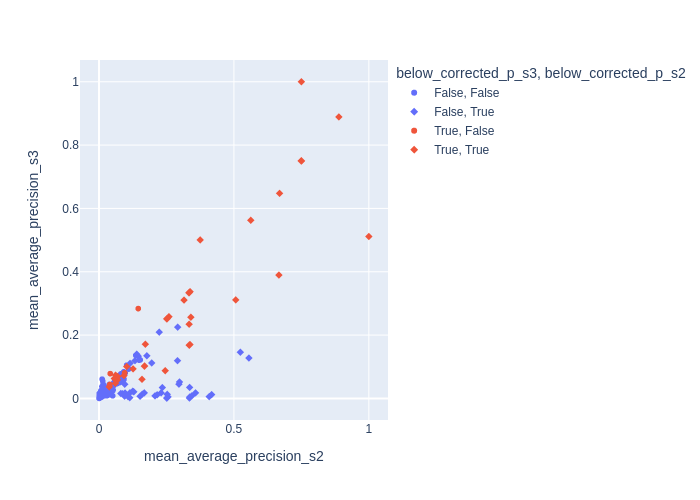

In [15]:
fig = px.scatter(
    df,
    x="mean_average_precision_s2",
    y="mean_average_precision_s3",
    color="below_corrected_p_s3",
    symbol="below_corrected_p_s2",
)

fig.show("png")
fig.write_image("figures/compare-s2-s3.png", scale=2, height="480", width="640")

In [16]:
df.query("below_corrected_p_s3 != True and below_corrected_p_s2 == True")

,Metadata_corum_complex_list,mean_average_precision_s2,corrected_p_value_s2,below_corrected_p_s2,n_pos_pairs_s2,mean_average_precision_s3,corrected_p_value_s3,below_corrected_p_s3,n_pos_pairs_s3
9,"40S ribosomal subunit, cytoplasmic",0.089254,0.000961,True,66.000000,0.056081,0.176427,False,88.000000
103,Anaphase-promoting complex,0.336026,0.001745,True,6.000000,0.001950,1.000000,False,4.000000
114,B-WICH complex,0.230137,0.000961,True,10.000000,0.017518,0.348505,False,10.000000
115,B23-NPM3 complex,0.555556,0.001745,True,1.000000,0.127553,0.078836,False,1.600000
116,BAF complex,0.335907,0.000961,True,52.000000,0.034739,0.176427,False,30.000000
262,CLIC5A-EZR-PODXL complex,0.139922,0.049085,True,2.000000,0.139788,0.086288,False,2.000000
263,CNK1-SRC-RAF1 complex,0.095422,0.049085,True,2.000000,0.044647,0.156554,False,3.200000
266,COG complex,0.152254,0.001745,True,14.000000,0.006779,0.963859,False,12.000000
297,CTLH complex,0.255857,0.004092,True,3.000000,0.004900,0.515163,False,2.000000
310,"Casein kinase II (beta-dimer, alpha, alpha')",0.298377,0.000961,True,10.000000,0.051898,0.102709,False,10.000000
